<a href="https://colab.research.google.com/github/raegar/ImageProcessing/blob/main/Image_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Function to apply a 3x3 kernel (convolution) to an image
def apply_kernel(image, kernel):
    # Convert image to grayscale
    grayscale_image = image.convert("L")

    # Convert image to numpy array
    img_array = np.array(grayscale_image)

    # Get the dimensions of the image
    height, width = img_array.shape

    # Create an empty output image array to store the result
    output_array = np.zeros((height, width))

    # Define the padding size (1 pixel for 3x3 kernel)
    pad_size = 1

    # Pad the original image with zeros on the border
    padded_image = np.pad(img_array, pad_size, mode='constant', constant_values=0)

    # Perform the convolution
    for i in range(pad_size, height + pad_size):
        for j in range(pad_size, width + pad_size):
            # Extract the 3x3 region from the padded image
            region = padded_image[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1]

            # Perform element-wise multiplication and sum the result
            result = np.sum(region * kernel)

            # Assign the result to the corresponding pixel in the output array
            output_array[i-pad_size, j-pad_size] = result

    # Clip values to ensure they remain within the valid range [0, 255]
    output_array = np.clip(output_array, 0, 255)

    # Convert the output array back to an image
    output_image = Image.fromarray(output_array.astype(np.uint8))

    return output_image

# Example 3x3 kernels
# Blur kernel
averaging_kernel = np.array([[0.05, 0.1, 0.05],
                             [0.1, 0.3, 0.1],
                             [0.05, 0.1, 0.05]])

# Laplacian kernel (for sharpening)
laplacian_kernel = np.array([[0,  1, 0],
                             [1, -4, 1],
                             [0,  1, 0]])

# Load the image (provide your own image path)
image = Image.open('input_image.png')

# Apply the kernel to the image
smoothed_image = apply_kernel(image, averaging_kernel)
sharpened_image = apply_kernel(image, laplacian_kernel)

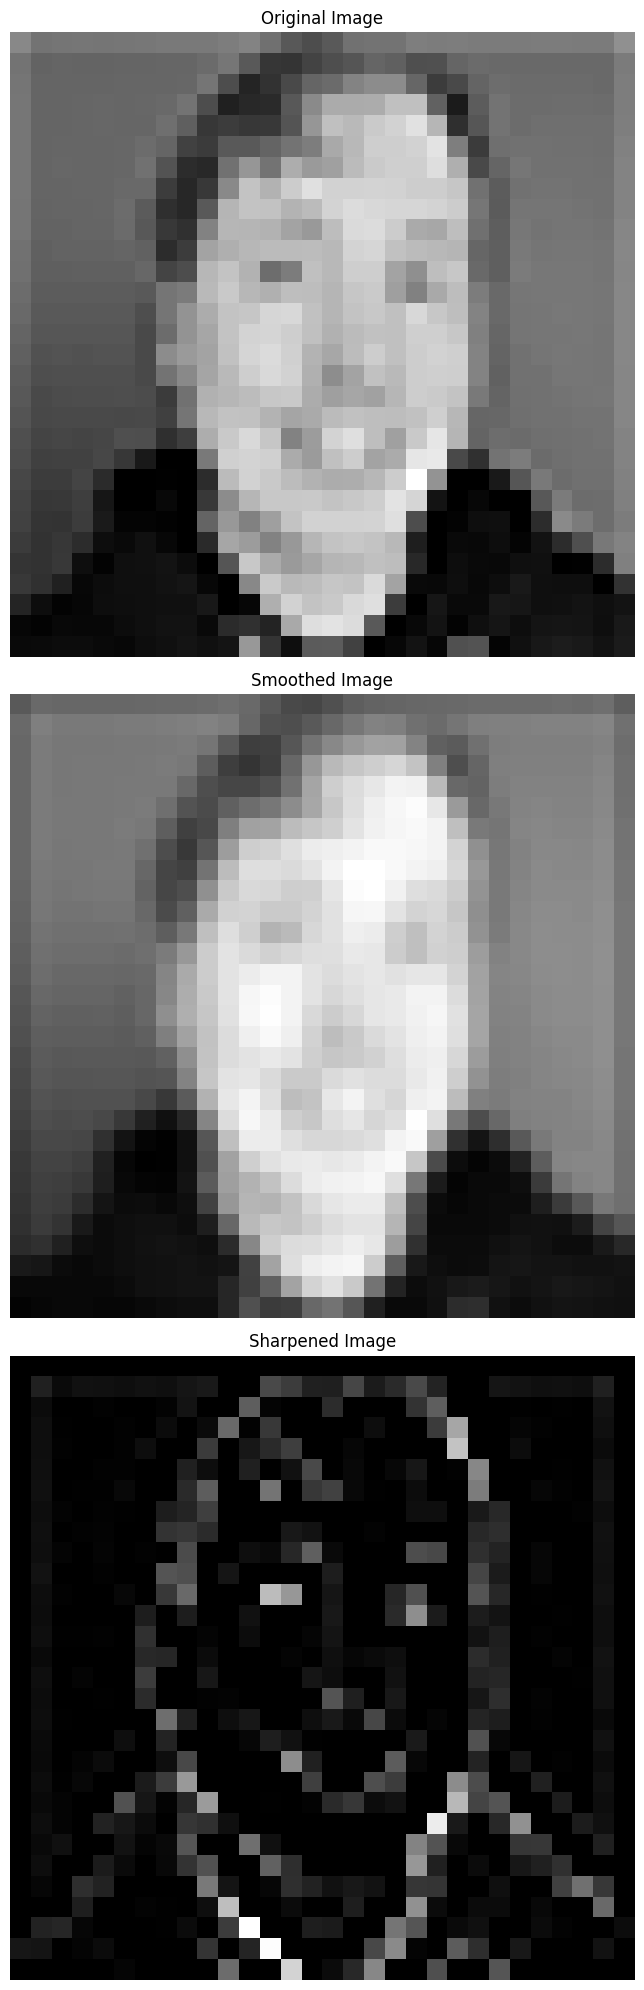

In [25]:
# Display the results using Matplotlib in a vertical column
plt.figure(figsize=(10, 20))

# Display the original image
plt.subplot(3, 1, 1)  # 3 rows, 1 column, position 1
plt.imshow(image.convert('L'), cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display the smoothed image
plt.subplot(3, 1, 2)  # 3 rows, 1 column, position 2
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')

# Display the sharpened image
plt.subplot(3, 1, 3)  # 3 rows, 1 column, position 3
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()
